# Predicción de default financiero usando métodos de aprendizaje automático
### Implementación del modelo y entrenamiento

**Estudiantes**

Federico Ocampo Ortiz, Ing. Sistemas. e-mail: federico.ocampoo@udea.edu.co

Andrés Felipe Orrego Quintero. Ing. Sistemas. e-mail: andres.orrego2@udea.edu.co

**Asesora**

Maria Bernarda Salazar Sánchez, PhD. e-mail: bernarda.salazar@udea.edu.co

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.dummy import DummyClassifier
from xgboost import XGBClassifier

# roc curve 
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Dataset

In [3]:
# read file from the path
df = pd.read_csv('data/Preprocessed_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 140742 entries, 0 to 140741
Data columns (total 12 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Incumplimiento                  140742 non-null  int64  
 1   TasaUtilizacionLineasRotativas  140742 non-null  float64
 2   Edad                            140742 non-null  float64
 3   Mora30a59dias                   140742 non-null  float64
 4   RazonDeudaMensual               140742 non-null  float64
 5   IngresoMensual                  140742 non-null  float64
 6   CantidadCreditosActivos         140742 non-null  float64
 7   MoraMayorA90                    140742 non-null  float64
 8   CantidadCreditosDeVivienda      140742 non-null  float64
 9   Mora60a89dias                   140742 non-null  float64
 10  CantidadDependientes            140742 non-null  float64
 11  OcurrenciasMora                 140742 non-null  float64
dtypes: float64(11), 

In [4]:
# features list
features = df.columns.tolist()
features.remove('Incumplimiento')

X = df[features]
y = df['Incumplimiento']

# Balance de clases
¿Donde se trabaja esto?

# Conjunto de datos

In [5]:
# split the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")

print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (98519, 11)
X_test shape: (42223, 11)
y_train shape: (98519,)
y_test shape: (42223,)


# Implementación del modelo
## Linea Base
Primero iniciamos con un clasificador dummy que predice sin tener en cuenta las variables de entradas. En este caso predice que todas las salidas son 0, lo que significa que todas las personas pagan sus créditos. Este clasificador nos sirve como base para comparar los resultados de los otros clasificadores.

In [6]:
# implement naive model to check the accuracy
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(X_train, y_train)
dummy_clf.score(X_test, y_test)

0.9419984368708998

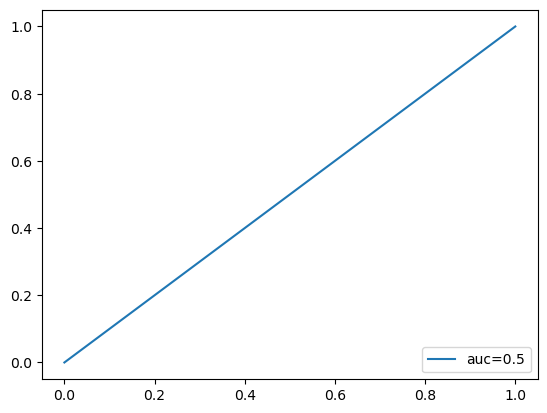

In [7]:
y_pred_proba = dummy_clf.predict_proba(X_test)[::,1]
fpr, tpr, th = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc_metric = auc(fpr, tpr)

plt.plot(fpr, tpr,label="auc="+str(auc_metric))
plt.legend(loc=4)
plt.show()

In [12]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression( random_state=42, max_iter=1000 )
logreg.fit(X_train, y_train)

y_pred_proba = logreg.predict_proba(X_test)[:,1]
fpr, tpr, th = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc_metric = auc(fpr, tpr)

plt.plot(fpr, tpr,label="auc="+str(auc_metric))
plt.legend(loc=4)
plt.show()


TypeError: C function sklearn.utils._cython_blas.__pyx_fuse_0_copy has wrong signature (expected void (int, float *, int, float *, int), got void (int, float const *, int, float const *, int))

In [15]:
# score of the model
print(f"Train score: {logreg.score(X_train, y_train)}")
print(f"Test score: {logreg.score(X_test, y_test)}")


Train score: 0.9434017803672388
Test score: 0.943182625583213


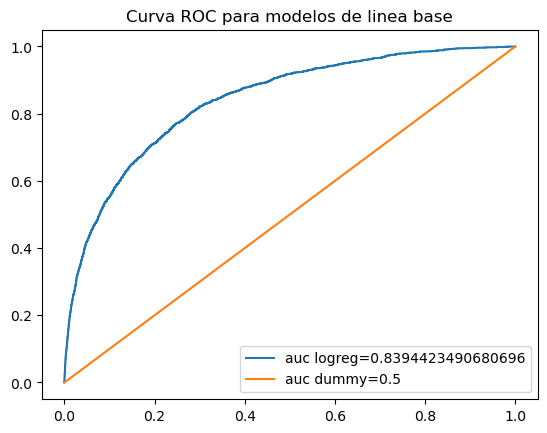

In [18]:
#show roc curve for model dummy and logistic regression in same plot
y_pred_proba = logreg.predict_proba(X_test)[::,1]

fpr, tpr, th = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc_metric = auc(fpr, tpr)

plt.plot(fpr, tpr,label="auc logreg="+str(auc_metric))

y_pred_proba = dummy_clf.predict_proba(X_test)[::,1]
fpr, tpr, th = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc_metric = auc(fpr, tpr)

plt.plot(fpr, tpr,label="auc dummy="+str(auc_metric))

plt.legend(loc=4)
plt.title('Curva ROC para modelos de linea base')
plt.show()


## XGBoost
El modelo XGB ya arroje buenos resultados con los parametros predeterminados, que son los siguientes: learning_rate=0.300000012; max_depth=6; n_estimators=100.

In [9]:
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)
xgb_clf.score(X_test, y_test)

0.9422826421618549

In [10]:
# ModelXGB
modelXGB = XGBClassifier( n_estimators = 150, learning_rate=0.05, max_depth = 5) \
                .fit(X_train, y_train)
modelXGB.score(X_test, y_test)

0.943727352390877

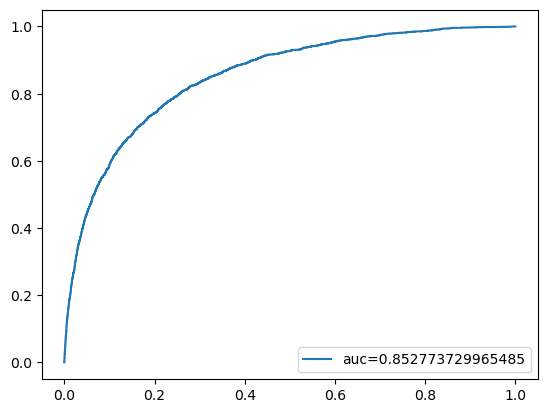

In [13]:
y_pred_proba = modelXGB.predict_proba(X_test)[::,1]
fpr, tpr, th = roc_curve(y_test,  y_pred_proba, pos_label=1)
auc_metric = auc(fpr, tpr)

plt.plot(fpr, tpr,label="auc="+str(auc_metric))
plt.legend(loc=4)
plt.show()
